## NLTK 자연어 처리 패키지

NLTK 패키지는 교육용으로 개발된 자연어 처리 및 문서분석용 파이썬 패키지이다.

- 말뭉치
- 토큰화
- 정규화
- 빈도 분석
- 워드 클라우드
- 한글 형태소 분석
- 확률론적 언어 모형
- Bag of Words
- TF-IDF

### 말뭉치

말뭉치는 자연어 분석 작업을 위해 만든 샘플 문서 집합을 말한다. 텍스트 분석에 필요한 텍스트 데이터

웹크롤링 등으로 수집


In [1]:
%%time
import nltk
nltk.download('book')
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\82109\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     C:\Users\82109\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package chat80 to
[nltk_data]    |     C:\Users\82109\AppData\Roaming\nltk_data...
[nltk_data]    |   Package chat80 is already up-to-date!
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\82109\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package conll2000 to
[nltk_data]    |     C:\Users\82109\AppData\Roaming\nltk_data...
[nltk_data]    |   Package conll2000 is already up-to-date!
[nltk_data]    | Downloading package conll2002 to
[nltk_data]    |     C:\Users\82109\AppData\R

Wall time: 2.57 s


[nltk_data]    |   Package universal_tagset is already up-to-date!
[nltk_data]    | Downloading package punkt to
[nltk_data]    |     C:\Users\82109\AppData\Roaming\nltk_data...
[nltk_data]    |   Package punkt is already up-to-date!
[nltk_data]    | Downloading package book_grammars to
[nltk_data]    |     C:\Users\82109\AppData\Roaming\nltk_data...
[nltk_data]    |   Package book_grammars is already up-to-date!
[nltk_data]    | Downloading package city_database to
[nltk_data]    |     C:\Users\82109\AppData\Roaming\nltk_data...
[nltk_data]    |   Package city_database is already up-to-date!
[nltk_data]    | Downloading package tagsets to
[nltk_data]    |     C:\Users\82109\AppData\Roaming\nltk_data...
[nltk_data]    |   Package tagsets is already up-to-date!
[nltk_data]    | Downloading package panlex_swadesh to
[nltk_data]    |     C:\Users\82109\AppData\Roaming\nltk_data...
[nltk_data]    |   Package panlex_swadesh is already up-to-date!
[nltk_data]    | Downloading package average

True

In [2]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [3]:
emma_raw = nltk.corpus.gutenberg.raw('austen-emma.txt')


print(emma_raw[:1302])

[Emma by Jane Austen 1816]

VOLUME I

CHAPTER I


Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence; and had lived nearly twenty-one years in the world
with very little to distress or vex her.

She was the youngest of the two daughters of a most affectionate,
indulgent father; and had, in consequence of her sister's marriage,
been mistress of his house from a very early period.  Her mother
had died too long ago for her to have more than an indistinct
remembrance of her caresses; and her place had been supplied
by an excellent woman as governess, who had fallen little short
of a mother in affection.

Sixteen years had Miss Taylor been in Mr. Woodhouse's family,
less as a governess than a friend, very fond of both daughters,
but particularly of Emma.  Between _them_ it was more the intimacy
of sisters.  Even before Miss Taylor had ceased to hold the nominal
office of governess, the mildness o

### 토근화

- 토큰화
    - 말뭉치(텍스트 데이터)를 '토큰'이라고 불리는 작은 단위로 나누는 행위
    
- 토큰
    - 문장 , 단어 ,형태소 등 분석에 있어서 의미를 가지는 단위
    
- 토큰의 명칭
    - 토큰의 이름은 실제 토근의 활용과 관계가 없다.
    - 숫자 혹은 기호를 나타내거나 품사 등을 덧붙여서 쓰는 경우도 있음

####  토큰의 종류
    - 영어 : 의미가 같은 정규화된 단어
    - 한국어 : 의미가 같은 정규화된 형태소

### 정규화

정규화(Normalization)
    - 의미와 쓰임이 같은 단어를 같은 토큰으로 표시

- 대소문자 통합 (case removal)
- 어간 추출 (stemming)
- 표제어 추출 (lemmaization)
- 품사 부착 (Part-Of-Speech tagging)
- 불용어 (stopwords)

### 어간 추출

- 어간 추출 (stemming)
    - 단어를 어간과 접사로 분리하여 단순히 접사를 삭제하거나 교체
        - 어간(stem): 단어의 의미를 담고 있는 핵심 부분
        - 접사(affix): 단어에 부가적인 의미를 주는 부분
        
- 단순 알고리즘 사용
    - 포터(Porter) 알고리즘
    - 랭케스터(Lancaster) 알고리즘

### 표제어 추출

- 표제어 추출 (Lemmatization)
    - 기본 사전형 단어로 변형
    - am,is,are,was,were,been => be
    - has,had => have   - 사전(WordNet)정보 사용

### 품사 부착
- 품사 (POS :part of Speech)
    - 단어의 쓰임에 따른 구분
    
- 동일한 철자의 단어가 다른 의미나 다른 품사로 쓰이는 경우
    - 다른 토큰으로 토큰화 해야 한다.
    
- 예 :
    - Permit:허락하다(동사) , 허가증(명사)

### 불용어

- 불용어(Stop-Words)
    - 분석의 필요성이 없는 단어
    - 모든 문서에서 너무 자주 쓰이는 단어
    - 너무 드물게 나타나는 단어

#### Step1: 토큰화


word tokenize 사용

In [4]:
sent = emma_raw[50:196]
print(sent)

Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence


In [5]:
from nltk.tokenize import word_tokenize
word_tokenize(sent)

['Emma',
 'Woodhouse',
 ',',
 'handsome',
 ',',
 'clever',
 ',',
 'and',
 'rich',
 ',',
 'with',
 'a',
 'comfortable',
 'home',
 'and',
 'happy',
 'disposition',
 ',',
 'seemed',
 'to',
 'unite',
 'some',
 'of',
 'the',
 'best',
 'blessings',
 'of',
 'existence']

#### step2: 어간추출


In [6]:
from nltk.stem import PorterStemmer, LancasterStemmer

In [7]:
st1 = PorterStemmer()
st2 = LancasterStemmer()


In [8]:
words = ['fly','flies','flying','flew','flown']
print('Porter Stemmer :',[st1.stem(w) for w in words])
print('Lancaster Stemmer :',[st2.stem(w) for w in words])

Porter Stemmer : ['fli', 'fli', 'fli', 'flew', 'flown']
Lancaster Stemmer : ['fly', 'fli', 'fly', 'flew', 'flown']


####  step3: 표제어 추출

WordNetLemmatizer 사용

In [9]:
%%time
from nltk.stem import WordNetLemmatizer

lm = WordNetLemmatizer()

[lm.lemmatize(w,pos='v') for w in words]

# 텍스트가 길어지면 오래걸림

Wall time: 1.82 s


['fly', 'fly', 'fly', 'fly', 'fly']

In [10]:
from nltk.tag import pos_tag

sentence = 'Emma refused to permit us to obtain the refuse permit'

tagged_list = pos_tag(word_tokenize(sentence))
tagged_list

[('Emma', 'NNP'),
 ('refused', 'VBD'),
 ('to', 'TO'),
 ('permit', 'VB'),
 ('us', 'PRP'),
 ('to', 'TO'),
 ('obtain', 'VB'),
 ('the', 'DT'),
 ('refuse', 'NN'),
 ('permit', 'NN')]

In [11]:
from nltk.corpus import stopwords

stopwords.words('english')[:20]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his']

### NLTK 의 빈도 분석

- 두 가지 클래스 사용
    - Text 클래스
    - FreqDist 클래스

####  Text 클래스

NLTK 의 Text 클래스는 문서 분석에 유용한 여러가지 메서드를 제공한다.

- plot : 단어 빈도 그래프
- dispersion_plot : 단어 위치 그래프
- concordance : 단어 문맥 인쇄
- similar : 유사 단어 검색
- plot: 빈도 그래프

In [12]:
from nltk import Text
text = Text(word_tokenize(emma_raw))


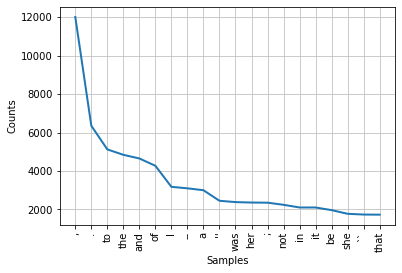

In [17]:
import matplotlib.pyplot as plt
text.plot(20)
plt.show()

In [18]:
python -m pip install -U pip
python -m pip install -U matplotlib

SyntaxError: invalid syntax (<ipython-input-18-9c2515b7f068>, line 1)

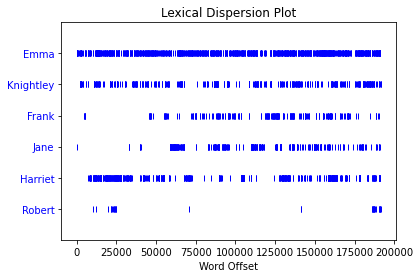

In [19]:
text.dispersion_plot(['Emma','Knightley','Frank','Jane','Harriet','Robert'])

####  단어 문맥 인쇄

concordance 메서드로 단어가 사용된 위치를 직접 표시하면 문맥(context)이 어떤지 볼수 있다.

In [20]:
text.concordance('Emma')

Displaying 25 of 855 matches:
[ Emma by Jane Austen 1816 ] VOLUME I CHAPT
ane Austen 1816 ] VOLUME I CHAPTER I Emma Woodhouse , handsome , clever , and 
both daughters , but particularly of Emma . Between _them_ it was more the int
 friend very mutually attached , and Emma doing just what she liked ; highly e
r own . The real evils , indeed , of Emma 's situation were the power of havin
ding-day of this beloved friend that Emma first sat in mournful thought of any
ing only half a mile from them ; but Emma was aware that great must be the dif
y . It was a melancholy change ; and Emma could not but sigh over it , and wis
 the rest of her life at Hartfield . Emma smiled and chatted as cheerfully as 
able to tell her how we all are . '' Emma spared no exertions to maintain this
 ' I have a great regard for you and Emma ; but when it comes to the question 
ful , troublesome creature ! '' said Emma playfully . `` That is what you have
e few people who could see faults in Emma Woodhouse , and

####  유사 단어 검색

similar 메서드는 같은 문맥에서 주어진 단어 대신 사용된 횟수가 높은 단어들을 찾는다.

In [21]:
text.similar('Emma',1)

she


In [22]:
text.common_contexts(['Emma','she'],1)


but_was


###  FreqDist 클래스

- FreqDist 클래스는 문서에 사용된 단어의 사용빈도 정보를 담는 클래스다.

- Text 클래스의 vocab 메서드로 추출할 수 있다.

- 토큰 리스트를 넣어서 직접 만들수도 있다

- 빈도 분석에 유용한 여러가지 메서드를 제공한다.

    - N: 빈도(횟수)
    - freq: 빈도(퍼센트)
    - most_coomon : 가장 많이 나오는 단어
    - plot : 가장 많이 나오는 단어 플롯


In [23]:
fd = text.vocab()
type(fd)

nltk.probability.FreqDist

####  토큰 리스트에서 생성

- 다음코드는 Emma 말뭉치에서 사람의 이름(NNP)만 모아서 FreqDIst 클래스 객체를 만들었다.

- 품사 태그에서 NNP(고유대명사)이면서 필요없는 단어(stop words)는 제거하였다.

In [24]:
from nltk import FreqDist

stopwords = ['Mr.','Mrs.','Miss','Mr','Mrs','Dear']
emma_tokens = pos_tag(word_tokenize(emma_raw))
names_list = [t[0] for t in emma_tokens if t[1] == 'NNP' and t[0] not in stopwords]
fd_names = FreqDist(names_list)

####  단어 빈도 분석

FreqDist 클래스는 단어를 키(Key), 출현 빈도를 값(value)으로 가지는 사전 자료형과 유사하다. 다음 코드는 전체 단어의 수, 'Emma'라는 단어의 출현 횟수, 확률을 각각 계산한다.

In [25]:
fd_names.N(), fd_names['Emma'],fd_names.freq('Emma')

(6924, 829, 0.11972848064702483)

most_common 메서드를 사용하면 가장 출현 횟수가 높은단어를 찾는다.

In [26]:
fd_names.most_common(5)

[('Emma', 829),
 ('Harriet', 477),
 ('Weston', 429),
 ('Elton', 374),
 ('Knightley', 373)]

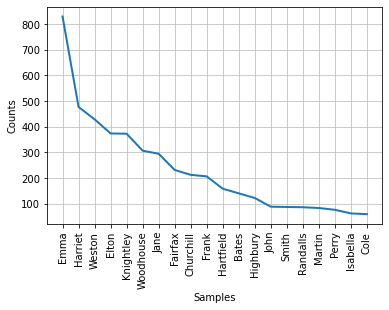

In [27]:
fd_names.plot(20)

####  워드 클라우드

In [29]:
from wordcloud import WordCloud

wc = WordCloud(width=1000, height=600, background_color='white', random_state=0)
plt.imshow(wc.generate_from_frequencies(fd_names))
plt.axis('off')
plt.show()

ImportError: The _imagingft C module is not installed

In [30]:
carroll_raw = nltk.corpus.gutenberg.raw('carroll-alice.txt') 
carroll_raw

'[Alice\'s Adventures in Wonderland by Lewis Carroll 1865]\n\nCHAPTER I. Down the Rabbit-Hole\n\nAlice was beginning to get very tired of sitting by her sister on the\nbank, and of having nothing to do: once or twice she had peeped into the\nbook her sister was reading, but it had no pictures or conversations in\nit, \'and what is the use of a book,\' thought Alice \'without pictures or\nconversation?\'\n\nSo she was considering in her own mind (as well as she could, for the\nhot day made her feel very sleepy and stupid), whether the pleasure\nof making a daisy-chain would be worth the trouble of getting up and\npicking the daisies, when suddenly a White Rabbit with pink eyes ran\nclose by her.\n\nThere was nothing so VERY remarkable in that; nor did Alice think it so\nVERY much out of the way to hear the Rabbit say to itself, \'Oh dear!\nOh dear! I shall be late!\' (when she thought it over afterwards, it\noccurred to her that she ought to have wondered at this, but at the time\nit al

In [31]:
from nltk import FreqDist

stopwords = ['Mr.','Mrs.','Miss','Mr','Mrs','Dear']
carroll_tokens = pos_tag(word_tokenize(carroll_raw))
names_list = [t[0] for t in carroll_tokens if t[1] == 'NNP' and t[0] not in stopwords]
fd_names = FreqDist(names_list)

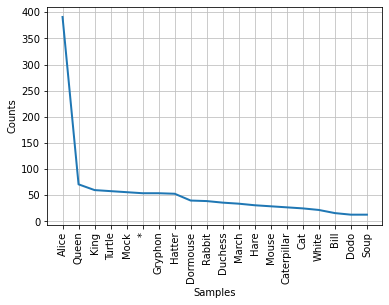

In [32]:
fd_names.plot(20)

In [33]:
from wordcloud import WordCloud

wc = WordCloud(width=1000, height=600, background_color='white', random_state=0)
plt.imshow(wc.generate_from_frequencies(fd_names))
plt.axis('off')
plt.show()

ImportError: The _imagingft C module is not installed

### 한글 자연어 처리

- KoNLPy 패키지 사용

In [ ]:
from nltk.book import *
import matplotlib as mpl
mpl.use('TkAgg')
text4.dispersion_plot(["citizens", "democracy", "freedom", "duties", "America"])

In [ ]:
pip install Jpype1

In [ ]:
pip install konlpy

### KoNLPy 기능

- 샘플 말뭉치
    - kolaw: 헌법 말뭉치
    - kobill : 법안 말뭉치
    
- 한글 형태소 분석기
    - KoNLPy 는 다양한 형태소 분석, 태깅 라이브러리를 파이썬에서 쉽게 사용할 수 있도록 모아놓았다.

#### 형태소 분석기능

- nouns : 명사 추출
- morphs : 형태소 추출
- pos : 품사 부착

In [ ]:
from konlpy.corpus import kolaw

kolaw.fileids()

In [ ]:
c = kolaw.open('constitution.txt').read()
print(c[:450])

In [ ]:
from konlpy.corpus import kobill
kobill.fileids()

In [ ]:
d = kobill.open('1809890.txt').read()
print(d[:400])

In [ ]:
# from konlpy.tag import *

# hannanum = Hannanum()
# kkma = Kkma()
# okt = Okt()

###  Scikit-Learn. 의 문서 전처리 기능

#### BOW 인코딩

문서를 숫자 벡터로 변환하는 가장 기본적인 방법은 BOW 인코딩 방법이다.

$x_{i,j} = \text{문서 $d_i$내의 단어 $t_j$의 출현 빈도}$

$x_{i,j} = 
\begin{cases}
0, & \text{만약 단어 $t_j$가 문서 $d_i$ 안에 없으면} \\
1. & \text{만약 단어 $t_j$가 문서 $d_i$ 안에 있으면}
\end{cases}$

### scikit-Learn 의 BOW 인코더

Scikit-Learn 의 feature_extraction 서브패키지와 feature_extraction.text 서브패키지는 다음과 같은 BOW 인코더 클래스 제공

TfidfVectiorizer (가중치)

#### Vectorize 클래스 기능

Counter Vectrize 는 다음과 같은 작업 수행

1. 문서를 토큰 리스트 변환
2. 각 문서에서 토큰의 출현 빈도를 센다.
3. 각 문서를 BOW 인코딩 벡터로 변환한다.


###  Vectorize 클래스 사용법

1. 클래스 객체 생성
2. 말뭉치 넣고 fit 메서드 실행
3. vocabulary_ 속성에 단어장이 자동 생성됨
4. transform 메서드로 다른 문서를 BOW 인코딩
5. BOW 인코딩 결과는 Sparse 행렬로 만들어지므로 toarray 메서드로 보통행렬로 변환

###  TF-IDF 인코딩

TF-IDF 인코딩은 단어를 갯수 그대로 카운트하지 않고 모든 문서에 공통적으로 들어있는 단어의 경우 문서 구별능력이 떨어진다고 보아 가중치를 축소하는 방법

In [34]:
from sklearn.feature_extraction.text import TFidVectorizer

ImportError: cannot import name 'TFidVectorizer' from 'sklearn.feature_extraction.text' (C:\Users\82109\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py)

In [35]:
from sklearn.feature_extraction import DictVectorizer
v = DictVectorizer(sparse=False)
D = [{'A': 1, 'B': 2}, {'B': 3, 'C': 1}]
X = v.fit_transform(D)
X

array([[1., 2., 0.],
       [0., 3., 1.]])

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
    'This is the first document.',
    'This is the second second document.',
    'And the third one.',
    'Is this the first document?',
    'The last document?',
]
vect = CountVectorizer()
vect.fit(corpus)
vect.vocabulary_

{'this': 9,
 'is': 3,
 'the': 7,
 'first': 2,
 'document': 1,
 'second': 6,
 'and': 0,
 'third': 8,
 'one': 5,
 'last': 4}

In [37]:
vect.transform(['This is the second document.']).toarray()

array([[0, 1, 0, 1, 0, 0, 1, 1, 0, 1]], dtype=int64)

In [38]:
pip install gensim

  Created wheel for smart-open: filename=smart_open-2.0.0-py3-none-any.whl size=101346 sha256=b6c6cd1f614b2d27711411726b4fca73cc1b4650c9a18e69f4bcc38e07fcbe4a
  Stored in directory: c:\users\82109\appdata\local\pip\cache\wheels\bb\1c\9c\412ec03f6d5ac7d41f4b965bde3fc0d1bd201da5ba3e2636de
Successfully built smart-open
  Attempting uninstall: Cython
    Found existing installation: Cython 0.29.13
    Uninstalling Cython-0.29.13:
      Successfully uninstalled Cython-0.29.13
Note: you may need to restart the kernel to use updated packages.


###  Gensim 의 BOW 인코딩 기능

In [39]:
corpus = [
    'This is the first document.',
    'This is the second second document.',
    'And the third one.',
    'Is this the first document?',
    'The last documnet?',
]

In [40]:
token_list = [[text for text in doc.split()] for doc in corpus]
token_list 

[['This', 'is', 'the', 'first', 'document.'],
 ['This', 'is', 'the', 'second', 'second', 'document.'],
 ['And', 'the', 'third', 'one.'],
 ['Is', 'this', 'the', 'first', 'document?'],
 ['The', 'last', 'documnet?']]

In [41]:
from gensim.corpora import Dictionary

dictionary = Dictionary(token_list)
dictionary.token2id

{'This': 0,
 'document.': 1,
 'first': 2,
 'is': 3,
 'the': 4,
 'second': 5,
 'And': 6,
 'one.': 7,
 'third': 8,
 'Is': 9,
 'document?': 10,
 'this': 11,
 'The': 12,
 'documnet?': 13,
 'last': 14}

In [42]:
term_matrix = [dictionary.doc2bow(token) for token in token_list]
term_matrix

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)],
 [(0, 1), (1, 1), (3, 1), (4, 1), (5, 2)],
 [(4, 1), (6, 1), (7, 1), (8, 1)],
 [(2, 1), (4, 1), (9, 1), (10, 1), (11, 1)],
 [(12, 1), (13, 1), (14, 1)]]

In [43]:
from gensim.models import TfidfModel

tfidf = TfidfModel(term_matrix)

for doc in tfidf[term_matrix]:
    print('doc:')
    for k,v in doc:
        print(k,v)

doc:
0 0.49633406058198626
1 0.49633406058198626
2 0.49633406058198626
3 0.49633406058198626
4 0.12087183801361165
doc:
0 0.25482305694621393
1 0.25482305694621393
3 0.25482305694621393
4 0.0620568558708622
5 0.8951785160431313
doc:
4 0.07979258234193365
6 0.5755093812740171
7 0.5755093812740171
8 0.5755093812740171
doc:
2 0.3113637188032758
4 0.07582615816930939
9 0.5469012794372422
10 0.5469012794372422
11 0.5469012794372422
doc:
12 0.5773502691896258
13 0.5773502691896258
14 0.5773502691896258


####  토픽 모델링

- 토픽(Topic)
    - 문서를 구성하는 단어의 비율
    - 문서 집합의 추상적인 주체

####  텍스트 데이터 다운로드

In [45]:

from sklearn.datasets import fetch_20newsgroups
newsgroups = fetch_20newsgroups(categories=['comp.graphics','rec.sport.baseball','sci.med'])

#### 명사 추출

In [46]:
%%time
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize

tagged_list = [pos_tag(word_tokenize(doc)) for doc in newsgroups.data]
nouns_list = [[t[0] for t in doc if t[1].startswith('N')] for doc in tagged_list]

Wall time: 31.1 s


#### 표제어 추출

In [47]:
from nltk.stem import WordNetLemmatizer

lm = WordNetLemmatizer()
nouns_list = [[lm.lemmatize(w,pos='n') for w in doc] for doc in nouns_list]

#### 불용어 제거

In [51]:
import re
token_list = [[text.lower() for text in doc] for doc in nouns_list]
token_list = [[re.sub(r"[^A-Za-z]+", '', word) for word in doc]
              for doc in token_list]

In [ ]:
from nltk.corpus import stopwords

stop_words = stop